# World Bank GDP Per Capita Analysis

This notebook explores GDP per capita data from the World Bank using the `wbdata` package.
We'll create visualizations showing:
1. GDP per capita trends over time for BRICS countries
2. Average GDP per capita for BRICS over the last decade
3. Scatter plot of all countries for the most recent year

**Note**: The World Bank API is free and open - no API key required for basic usage!

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wbdata
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


## Define Countries and Indicators

In [6]:
# BRICS countries (ISO codes)
BRICS_COUNTRIES = {
    'BRA': 'Brazil',
    'RUS': 'Russia', 
    'IND': 'India',
    'CHN': 'China',
    'ZAF': 'South Africa'
}

# GDP per capita indicator
GDP_INDICATOR = 'NY.GDP.PCAP.CD'  # GDP per capita (current US$)

# Time range for analysis
START_YEAR = 2000
END_YEAR = 2025
LAST_DECADE_START = 2014

print(f"Analysis setup:")
print(f"- Countries: {list(BRICS_COUNTRIES.values())}")
print(f"- Indicator: GDP per capita (current US$)")
print(f"- Time range: {START_YEAR}-{END_YEAR}")
print(f"- Last decade: {LAST_DECADE_START}-{END_YEAR}")

Analysis setup:
- Countries: ['Brazil', 'Russia', 'India', 'China', 'South Africa']
- Indicator: GDP per capita (current US$)
- Time range: 2000-2025
- Last decade: 2014-2025


## Fetch GDP Per Capita Data for BRICS Countries

In [7]:
# Fetch data for BRICS countries
print("Fetching GDP per capita data for BRICS countries...")

# Use the correct wbdata syntax with date range as strings
brics_data = wbdata.get_dataframe(
    {GDP_INDICATOR: 'GDP_per_capita'},
    country=list(BRICS_COUNTRIES.keys()),
    date=(str(START_YEAR), str(END_YEAR))
)

# Reset index to make country and date columns
brics_data = brics_data.reset_index()

# Create reverse mapping from full names to our preferred names
COUNTRY_NAME_MAPPING = {
    'Brazil': 'Brazil',
    'Russian Federation': 'Russia',
    'India': 'India', 
    'China': 'China',
    'South Africa': 'South Africa'
}

# Map country names 
brics_data['country_name'] = brics_data['country'].map(COUNTRY_NAME_MAPPING)

# Convert date to year (it should already be a year, but let's be safe)
if 'date' in brics_data.columns:
    brics_data['year'] = pd.to_datetime(brics_data['date'], errors='coerce').dt.year
    # If date conversion fails, try to extract year directly
    if brics_data['year'].isna().all():
        brics_data['year'] = brics_data['date'].astype(str).str.extract('(\d{4})').astype(int)
else:
    # If no date column, assume index contains the date info
    brics_data['year'] = brics_data.index.get_level_values('date').year

# Remove rows with missing GDP data
brics_data = brics_data.dropna(subset=['GDP_per_capita'])

print(f"Data fetched successfully!")
print(f"Shape: {brics_data.shape}")
print(f"Years available: {brics_data['year'].min()} - {brics_data['year'].max()}")
print(f"Countries: {brics_data['country_name'].unique()}")
print("\nFirst few rows:")
brics_data.head()

Fetching GDP per capita data for BRICS countries...
Data fetched successfully!
Shape: (125, 5)
Years available: 2000 - 2024
Countries: ['Brazil' 'China' 'India' 'Russia' 'South Africa']

First few rows:
Data fetched successfully!
Shape: (125, 5)
Years available: 2000 - 2024
Countries: ['Brazil' 'China' 'India' 'Russia' 'South Africa']

First few rows:


,country,date,GDP_per_capita,country_name,year
0,Brazil,2024,10280.314862,Brazil,2024
1,Brazil,2023,10377.589279,Brazil,2023
2,Brazil,2022,9281.333344,Brazil,2022
3,Brazil,2021,7972.536650,Brazil,2021
4,Brazil,2020,7074.193783,Brazil,2020


## 1. Line Chart: GDP Per Capita Trends Over Time for BRICS

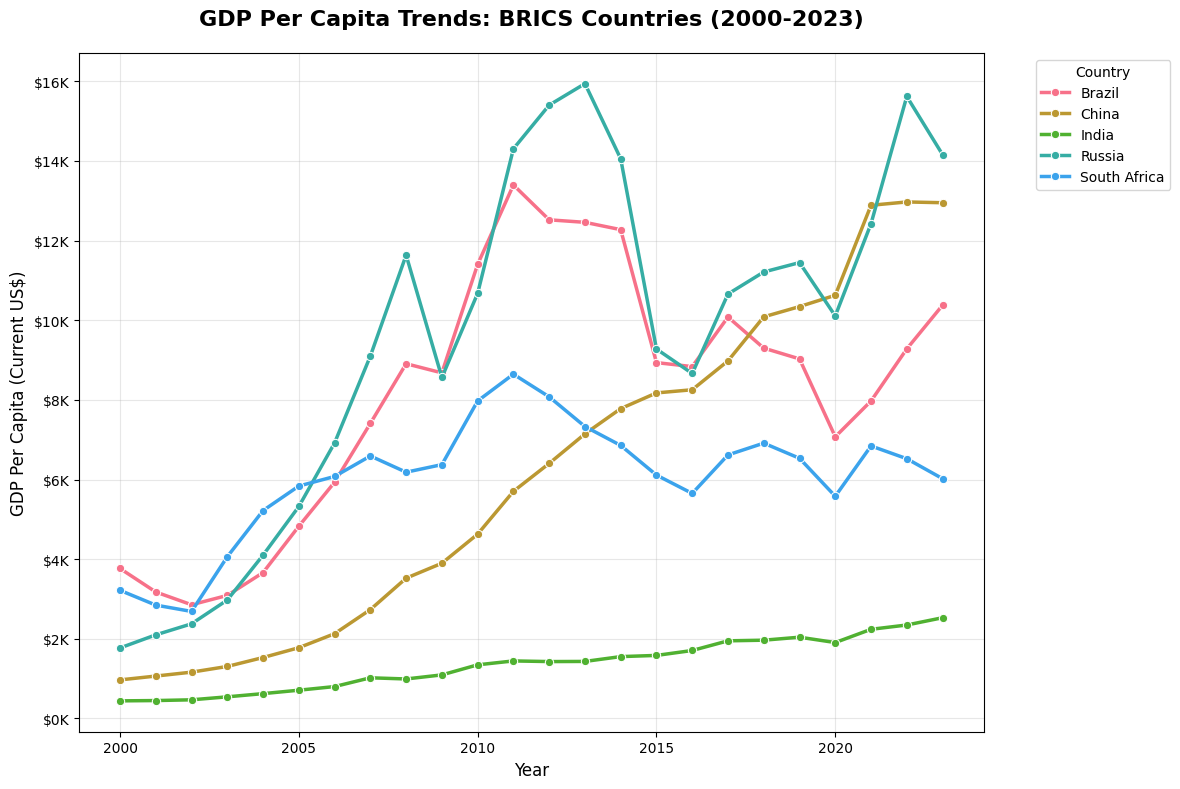


Key insights:

GDP per capita ranking in 2023:
Russia: $14,159
China: $12,951
Brazil: $10,378
South Africa: $6,023
India: $2,530


In [4]:
# Create line plot
plt.figure(figsize=(12, 8))

sns.lineplot(
    data=brics_data, 
    x='year', 
    y='GDP_per_capita', 
    hue='country_name',
    marker='o',
    linewidth=2.5,
    markersize=6
)

plt.title('GDP Per Capita Trends: BRICS Countries (2000-2023)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (Current US$)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Format y-axis to show values in thousands
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.show()

# Show some key statistics
print("\nKey insights:")
latest_year = brics_data['year'].max()
latest_data = brics_data[brics_data['year'] == latest_year].sort_values('GDP_per_capita', ascending=False)
print(f"\nGDP per capita ranking in {latest_year}:")
for i, row in latest_data.iterrows():
    print(f"{row['country_name']}: ${row['GDP_per_capita']:,.0f}")

## 2. Column Chart: Average GDP Per Capita for BRICS (Last Decade)

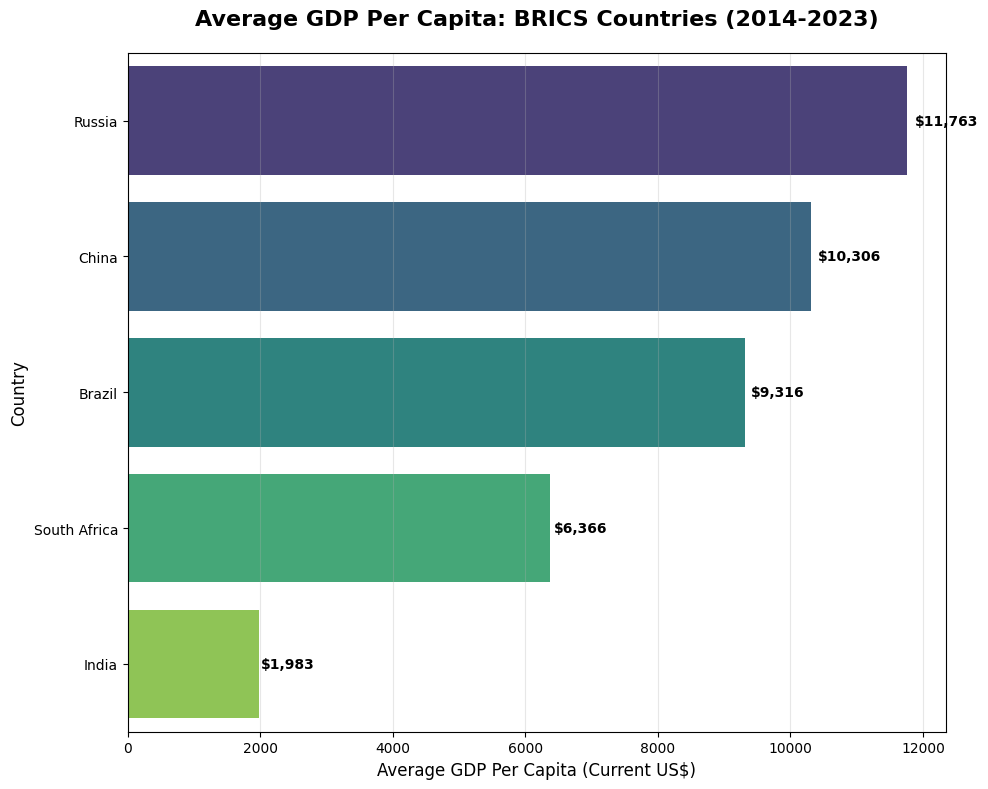


Average GDP per capita (2014-2023):
Russia: $11,763
China: $10,306
Brazil: $9,316
South Africa: $6,366
India: $1,983


In [8]:
# Filter data for last decade
last_decade_data = brics_data[brics_data['year'] >= LAST_DECADE_START]

# Calculate average GDP per capita for each country in the last decade
avg_gdp_decade = last_decade_data.groupby('country_name')['GDP_per_capita'].mean().sort_values(ascending=False)

# Create bar plot
plt.figure(figsize=(10, 8))

bars = sns.barplot(
    x=avg_gdp_decade.values, 
    y=avg_gdp_decade.index,
    orient='h',
    palette='viridis'
)

plt.title(f'Average GDP Per Capita: BRICS Countries ({LAST_DECADE_START}-{END_YEAR})', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average GDP Per Capita (Current US$)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Add value labels on bars
for i, bar in enumerate(bars.patches):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'${width:,.0f}', ha='left', va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nAverage GDP per capita ({LAST_DECADE_START}-{END_YEAR}):")
for country, avg_gdp in avg_gdp_decade.items():
    print(f"{country}: ${avg_gdp:,.0f}")

## 3. Fetch Data for All Countries (Most Recent Year)

In [9]:
# Fetch GDP per capita data for all countries for the most recent year
print("Fetching GDP per capita data for all countries...")

# Get the most recent year with data
recent_year = END_YEAR

# Fetch data for all countries for the most recent year (use string format)
all_countries_data = wbdata.get_dataframe(
    {GDP_INDICATOR: 'GDP_per_capita'},
    date=str(recent_year)
)

# Reset index and clean data
all_countries_data = all_countries_data.reset_index()
all_countries_data = all_countries_data.dropna(subset=['GDP_per_capita'])

# Filter out aggregates and regions (keep only countries)
# This is a simple filter - you might want to refine this based on your needs
excluded_patterns = ['income', 'World', 'income', 'demographic', 'fragile', 'IBRD', 'IDA', 
                    'Arab', 'Africa', 'America', 'Asia', 'Europe', 'Pacific', 'Union']

def is_country(country_name):
    country_lower = country_name.lower()
    return not any(pattern.lower() in country_lower for pattern in excluded_patterns)

all_countries_data = all_countries_data[all_countries_data['country'].apply(is_country)]

# Add year column
if 'date' in all_countries_data.columns:
    all_countries_data['year'] = pd.to_datetime(all_countries_data['date'], errors='coerce').dt.year
    # If date conversion fails, try to extract year directly
    if all_countries_data['year'].isna().all():
        all_countries_data['year'] = all_countries_data['date'].astype(str).str.extract('(\d{4})').astype(int)
else:
    all_countries_data['year'] = recent_year

# Highlight BRICS countries
all_countries_data['is_brics'] = all_countries_data['country'].isin(BRICS_COUNTRIES.keys())
all_countries_data['country_name'] = all_countries_data['country'].map(BRICS_COUNTRIES).fillna(all_countries_data['country'])

print(f"Data fetched for {len(all_countries_data)} countries in {recent_year}")
print(f"GDP per capita range: ${all_countries_data['GDP_per_capita'].min():,.0f} - ${all_countries_data['GDP_per_capita'].max():,.0f}")

all_countries_data.head()

Fetching GDP per capita data for all countries...
Data fetched for 200 countries in 2023
GDP per capita range: $192 - $256,581


,country,GDP_per_capita,year,is_brics,country_name
3,Caribbean small states,17582.263680,2023,False,Caribbean small states
9,Euro area,45068.701093,2023,False,Euro area
15,Heavily indebted poor countries (HIPC),1140.196070,2023,False,Heavily indebted poor countries (HIPC)
26,Least developed countries: UN classification,1220.238439,2023,False,Least developed countries: UN classification
36,OECD members,46672.513992,2023,False,OECD members


## 4. Scatter Plot: All Countries GDP Per Capita (Most Recent Year)

Fetching life expectancy data for all countries...
Fetching 2022 GDP data to match life expectancy data...
Fetching 2022 GDP data to match life expectancy data...
Combined data shape: (207, 3)
Life expectancy range: 53.9 - 85.7 years
Combined data shape: (207, 3)
Life expectancy range: 53.9 - 85.7 years


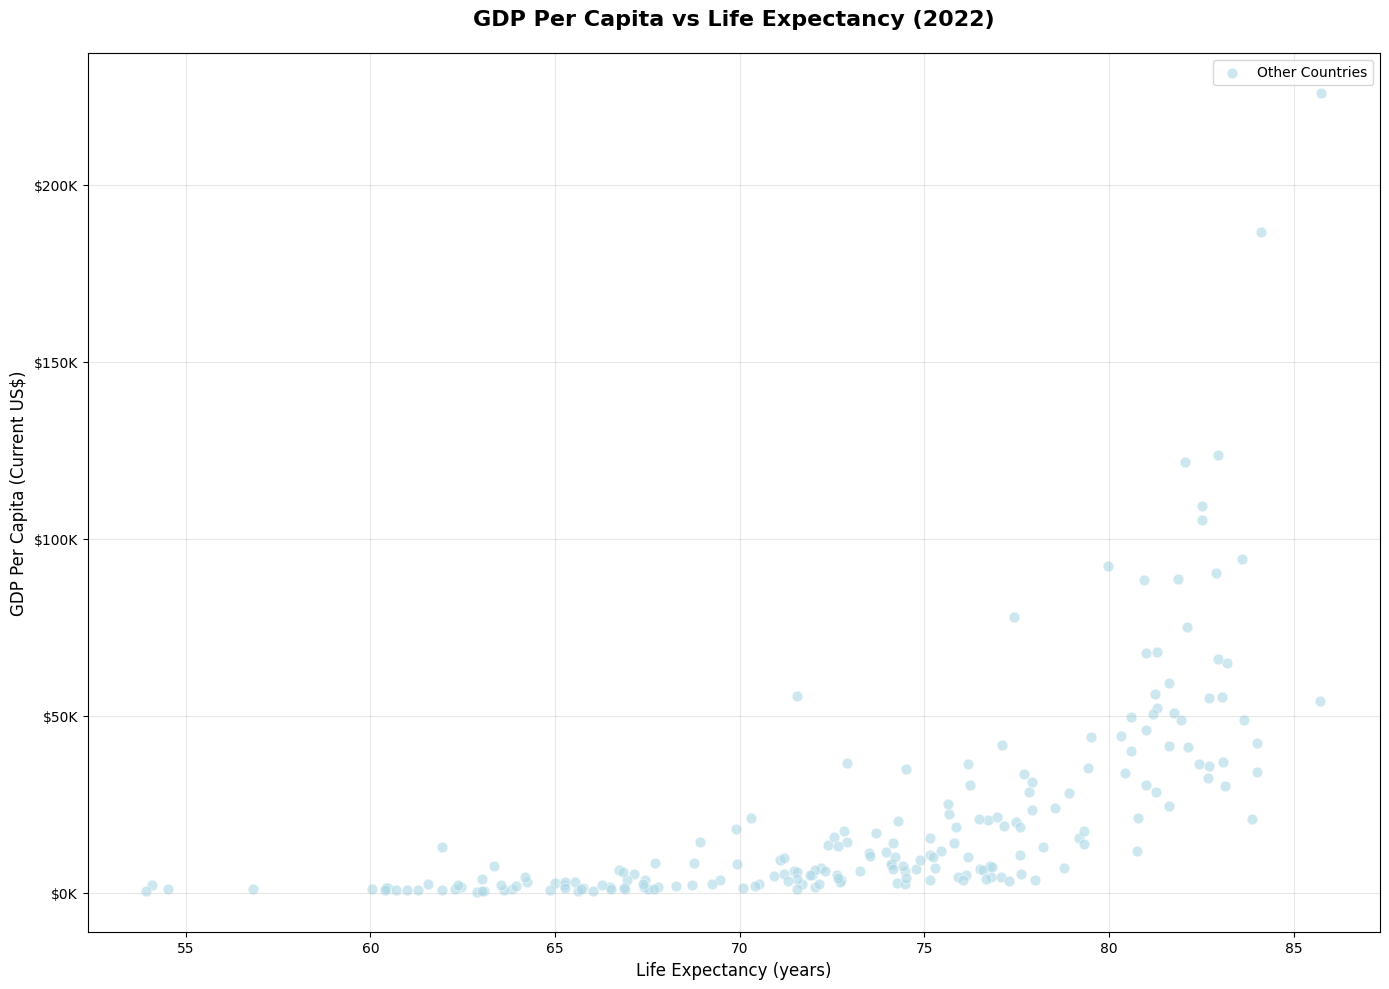


Key insights from GDP per capita vs Life Expectancy:
• Generally shows positive correlation: wealthier countries tend to have higher life expectancy
• Some countries may be outliers - high wealth but lower life expectancy, or vice versa
• BRICS countries span different positions on the wealth-health spectrum

BRICS Countries - Life Expectancy vs GDP per capita (2022):
  No BRICS countries found in 2022 data

Interesting comparisons:
• Highest life expectancy: Monaco (85.7 years, $226,052)
• Highest GDP per capita: Monaco ($226,052, 85.7 years)
• Correlation coefficient: 0.626 (closer to 1.0 = stronger positive relationship)


In [ ]:
    # Add BRICS highlighting - fix the mapping issue
    # Create a more comprehensive BRICS mapping
    BRICS_MAPPING = {
        'Brazil': 'Brazil',
        'Russian Federation': 'Russia',
        'India': 'India',
        'China': 'China',
        'South Africa': 'South Africa',
        # Also try ISO codes in case they're used
        'BRA': 'Brazil',
        'RUS': 'Russia', 
        'IND': 'India',
        'CHN': 'China',
        'ZAF': 'South Africa'
    }
    
    combined_data['is_brics'] = combined_data['country'].isin(BRICS_MAPPING.keys())
    combined_data['brics_name'] = combined_data['country'].map(BRICS_MAPPING)

### Alternative: Life Expectancy vs GDP Per Capita

If you want to create a life expectancy vs GDP scatter plot, you can try this code (note: may take time to load due to API limits):

In [ ]:
# Alternative approach: Try fetching life expectancy data with error handling
# Uncomment and run this cell if you want to attempt the life expectancy visualization

"""
try:
    print("Attempting to fetch life expectancy data...")
    
    # Try with a more recent year that might have better data availability
    life_exp_data = wbdata.get_dataframe(
        {'SP.DYN.LE00.IN': 'Life_Expectancy'},
        date="2022"  # Try 2022 instead of 2023
    )
    
    # Reset index and clean data
    life_exp_data = life_exp_data.reset_index()
    life_exp_data = life_exp_data.dropna(subset=['Life_Expectancy'])
    
    # Merge with GDP data (you may need to fetch 2022 GDP data too)
    gdp_2022 = wbdata.get_dataframe(
        {'NY.GDP.PCAP.CD': 'GDP_per_capita'},
        date="2022"
    ).reset_index().dropna(subset=['GDP_per_capita'])
    
    combined_data = gdp_2022.merge(life_exp_data[['country', 'Life_Expectancy']], on='country', how='inner')
    
    # Create the scatter plot
    plt.figure(figsize=(14, 10))
    
    # Add BRICS highlighting
    combined_data['is_brics'] = combined_data['country'].isin(BRICS_COUNTRIES.keys())
    
    sns.scatterplot(
        data=combined_data[~combined_data['is_brics']], 
        x='Life_Expectancy', 
        y='GDP_per_capita',
        alpha=0.6,
        s=60,
        color='lightblue',
        label='Other Countries'
    )
    
    # Highlight BRICS
    brics_data_life = combined_data[combined_data['is_brics']]
    if not brics_data_life.empty:
        plt.scatter(
            brics_data_life['Life_Expectancy'],
            brics_data_life['GDP_per_capita'],
            s=150,
            c='red',
            alpha=0.8,
            edgecolors='black',
            linewidth=2,
            label='BRICS Countries',
            zorder=5
        )
    
    plt.title('GDP Per Capita vs Life Expectancy (2022)', fontsize=16, fontweight='bold')
    plt.xlabel('Life Expectancy (years)', fontsize=12)
    plt.ylabel('GDP Per Capita (Current US$)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Format y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
    
    plt.tight_layout()
    plt.show()
    
    # Calculate correlation
    correlation = combined_data['Life_Expectancy'].corr(combined_data['GDP_per_capita'])
    print(f"Correlation between life expectancy and GDP per capita: {correlation:.3f}")
    
except Exception as e:
    print(f"Failed to fetch life expectancy data: {e}")
    print("This is often due to API rate limits or network issues. Try running again later.")
"""

print("Life expectancy code is commented out due to API limits.")
print("Uncomment the code above and run if you want to attempt this visualization.")

## Summary and Insights

In [13]:
print("=" * 60)
print("WORLD BANK GDP PER CAPITA ANALYSIS SUMMARY")
print("=" * 60)

print(f"\n📊 Analysis Period: {START_YEAR}-{END_YEAR}")
print(f"📊 Countries Analyzed: {', '.join(BRICS_COUNTRIES.values())}")
print(f"📊 Total Countries in Global Comparison: {len(all_countries_data)}")

print(f"\n💰 BRICS GDP Per Capita ({recent_year}):")
brics_recent = brics_data[brics_data['year'] == brics_data['year'].max()].sort_values('GDP_per_capita', ascending=False)
for _, row in brics_recent.iterrows():
    print(f"   • {row['country_name']}: ${row['GDP_per_capita']:,.0f}")

print(f"\n📈 Key Trends:")
print(f"   • Highest GDP per capita in BRICS: {brics_recent.iloc[0]['country_name']}")
print(f"   • Fastest growing period: Look for steepest slopes in the line chart")
print(f"   • Global context: BRICS countries span a wide range of development levels")

print(f"\n🌍 Global Perspective:")
world_stats = all_countries_data['GDP_per_capita'].describe()
print(f"   • Global median GDP per capita: ${world_stats['50%']:,.0f}")
print(f"   • Global average GDP per capita: ${world_stats['mean']:,.0f}")
print(f"   • Range: ${world_stats['min']:,.0f} - ${world_stats['max']:,.0f}")

print("\n" + "=" * 60)
print("Analysis completed successfully! 🎉")
print("Data source: World Bank Open Data via wbdata package")
print("=" * 60)

WORLD BANK GDP PER CAPITA ANALYSIS SUMMARY

📊 Analysis Period: 2000-2023
📊 Countries Analyzed: Brazil, Russia, India, China, South Africa
📊 Total Countries in Global Comparison: 200

💰 BRICS GDP Per Capita (2023):
   • Russia: $14,159
   • China: $12,951
   • Brazil: $10,378
   • South Africa: $6,023
   • India: $2,530

📈 Key Trends:
   • Highest GDP per capita in BRICS: Russia
   • Fastest growing period: Look for steepest slopes in the line chart
   • Global context: BRICS countries span a wide range of development levels

🌍 Global Perspective:
   • Global median GDP per capita: $8,098
   • Global average GDP per capita: $21,766
   • Range: $192 - $256,581

Analysis completed successfully! 🎉
Data source: World Bank Open Data via wbdata package
